MatSE 580 HW 2

The TDB file : AlNi-1997Ansara.TDB

The link to the publication of the TDB file: https://doi.org/10.1016/S0925-8388(96)02652-7



In [26]:
#the heat capacity, entropy, enthalpy and Gibbs energy of each pure element(Ni,Al) as a function of temperature

In [27]:
import matplotlib.pyplot as plt
import numpy as np
from pycalphad import Database, calculate, equilibrium, variables as v
from PT import PT_phase_diagram

In [28]:
# Load the database
db_sgte = Database('AlNi-1997Ansara.TDB')

In [29]:
print(sorted(db_sgte.elements))

['/-', 'AL', 'NI', 'VA']


In [30]:
print(sorted(db_sgte.phases))

['AL3NI1', 'AL3NI2', 'AL3NI5', 'ALMO', 'ALTI_L10', 'BCC_A2', 'BCC_B2', 'C14_LAVES', 'C15_LAVES', 'DO19_HCP', 'FCC_A1', 'HCP_A3', 'H_L21', 'L12_FCC', 'LIQUID', 'NI3TI_D024', 'NITI2']


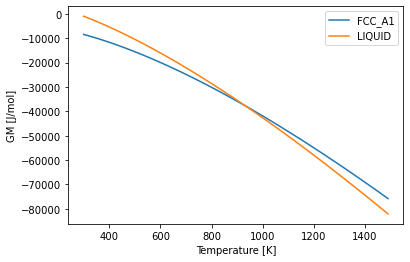

In [31]:
fcc_GM = calculate(db_sgte, ['AL', 'VA'], 'FCC_A1', P=101325, T=(300, 1500, 10), N=1)
liquid_GM = calculate(db_sgte, ['AL', 'VA'], 'LIQUID', P=101325, T=(300, 1500, 10), N=1)



# Squeeze is required because the array corresponding to GM is multidimensional for each T, P, and N where we've calculated the energy
plt.plot(fcc_GM.T, fcc_GM.GM.squeeze(), label='FCC_A1')
plt.plot(liquid_GM.T, liquid_GM.GM.squeeze(), label='LIQUID')

plt.xlabel("Temperature [K]")
plt.ylabel("GM [J/mol]")
plt.legend()


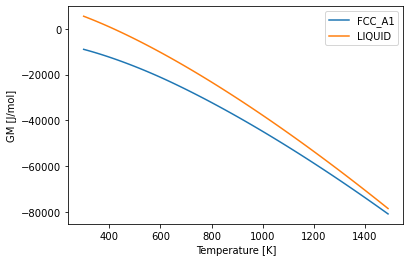

In [32]:
fcc_GM = calculate(db_sgte, ['Ni', 'VA'], 'FCC_A1', P=101325, T=(300, 1500, 10), N=1)
liquid_GM = calculate(db_sgte, ['Ni', 'VA'], 'LIQUID', P=101325, T=(300, 1500, 10), N=1)



# Squeeze is required because the array corresponding to GM is multidimensional for each T, P, and N where we've calculated the energy
plt.plot(fcc_GM.T, fcc_GM.GM.squeeze(), label='FCC_A1')
plt.plot(liquid_GM.T, liquid_GM.GM.squeeze(), label='LIQUID')

plt.xlabel("Temperature [K]")
plt.ylabel("GM [J/mol]")
plt.legend()


In [33]:
# The following shows the E-T plots of different phases of Ni-AL system

AL3NI2
ALMO
ALTI_L10
BCC_A2
C14_LAVES
DO19_HCP
H_L21
L12_FCC
LIQUID
NI3TI_D024


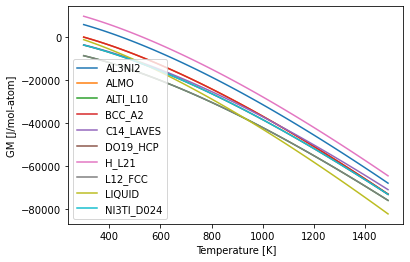

In [34]:
x=[]
y=[]
a=['AL3NI2', 'ALMO', 'ALTI_L10', 'BCC_A2', 'C14_LAVES', 'DO19_HCP', 'H_L21', 'L12_FCC', 'LIQUID', 'NI3TI_D024']
for i in sorted(a):
    print(i)
    GM=calculate(db_sgte, ['AL', 'VA'], i, P=101325, T=(300, 1500, 10), N=1)
    x=GM.T
    y=GM.GM.squeeze()
    plt.plot(x,y,label=i)
plt.xlabel("Temperature [K]")
plt.ylabel("GM [J/mol-atom]")
plt.legend()

In [35]:
# heat capacity of Ni and Al 

In [36]:
db_zn = Database('AlNi-1997Ansara.TDB')
phases=['AL3NI2', 'ALMO', 'ALTI_L10', 'BCC_A2', 'C14_LAVES', 'DO19_HCP', 'H_L21', 'L12_FCC', 'LIQUID', 'NI3TI_D024']

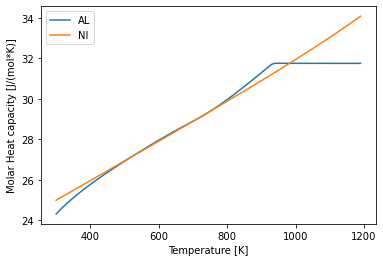

In [37]:
conditions = {  # mapping of state variable to values
    v.N: 1,
    v.P: 101325,
    # for now, only temperature has a range. If multiple variables have ranges, all combinations are calculated
    v.T: (300, 1200, 10),
}
equil_result = equilibrium(db_zn, ['AL','VA'], ['SOLID','LIQUID'], conditions, output='CPM')
equil_result2 = equilibrium(db_zn, ['NI','VA'], ['SOLID', 'LIQUID'], conditions, output='CPM')

# Squeeze is required because the array corresponding to HM is multidimensional for each T, P, and N where we've calculated the energy
plt.plot(equil_result.T, equil_result.CPM.squeeze(),label='AL')
plt.plot(equil_result2.T, equil_result2.CPM.squeeze(),label='NI')
plt.xlabel("Temperature [K]")
plt.ylabel("Molar Heat capacity [J/(mol*K)]")
plt.legend()

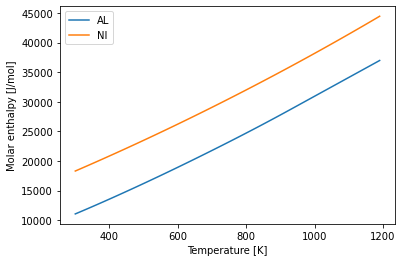

In [38]:
conditions = {  # mapping of state variable to values
    v.N: 1,
    v.P: 101325,
    # for now, only temperature has a range. If multiple variables have ranges, all combinations are calculated
    v.T: (300, 1200, 10),
}
equil_result = equilibrium(db_zn, ['AL','VA'], ['SOLID','LIQUID'], conditions, output='HM')
equil_result2 = equilibrium(db_zn, ['NI','VA'], ['SOLID', 'LIQUID'], conditions, output='HM')

# Squeeze is required because the array corresponding to HM is multidimensional for each T, P, and N where we've calculated the energy
plt.plot(equil_result.T, equil_result.HM.squeeze(),label='AL')
plt.plot(equil_result2.T, equil_result2.HM.squeeze(),label='NI')
plt.xlabel("Temperature [K]")
plt.ylabel("Molar enthalpy [J/mol]")
plt.legend()

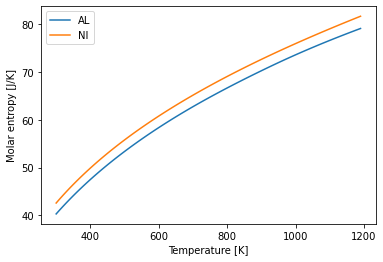

In [40]:
conditions = {  # mapping of state variable to values
    v.N: 1,
    v.P: 101325,
    # for now, only temperature has a range. If multiple variables have ranges, all combinations are calculated
    v.T: (300, 1200, 10),
}
equil_result = equilibrium(db_zn, ['AL','VA'], ['SOLID','LIQUID'], conditions, output='SM')
equil_result2 = equilibrium(db_zn, ['NI','VA'], ['SOLID', 'LIQUID'], conditions, output='SM')

# Squeeze is required because the array corresponding to HM is multidimensional for each T, P, and N where we've calculated the energy
plt.plot(equil_result.T, equil_result.SM.squeeze(),label='AL')
plt.plot(equil_result2.T, equil_result2.SM.squeeze(),label='NI')
plt.xlabel("Temperature [K]")
plt.ylabel("Molar entropy [J/K]")
plt.legend()

In [41]:
# Caculate The phase fractions as a function of temperature for the alloy with 50/50 of each element.

In [42]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from pycalphad import Database, calculate, equilibrium, binplot
import pycalphad.variables as v
from binary_helpers import plot_convex_hull

# Load database and choose the phases that will be considered
dbf = Database('AlNi-1997Ansara.TDB')
comps = ['AL', 'NI', 'VA']
phases = ['BCC_B2','LIQUID']

eq_alni = equilibrium(dbf, ['AL', 'NI', 'VA'], phases, {v.X('AL'): 0.5, v.T: (300, 2500, 20), v.P: 101325})
print(phases)

['BCC_B2', 'LIQUID']


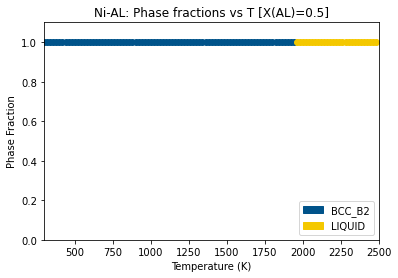

In [43]:
from pycalphad.plot.utils import phase_legend
phase_handles, phasemap = phase_legend(phases)

plt.gca().set_title('Ni-AL: Phase fractions vs T [X(AL)=0.5]')
plt.gca().set_xlabel('Temperature (K)')
plt.gca().set_ylabel('Phase Fraction')
plt.gca().set_ylim((0,1.1))
plt.gca().set_xlim((300, 2500))

for name in phases:
    phase_indices = np.nonzero(eq_alni.Phase.values == name)
    plt.scatter(np.take(eq_alni['T'].values, phase_indices[2]), eq_alni.NP.values[phase_indices], color=phasemap[name])
plt.gca().legend(phase_handles, phases, loc='lower right')

In [44]:
# Calculate the enthalpy of formation as a function of composition at 298K

In [45]:
from pycalphad import Database, equilibrium, Model, ReferenceState, variables as v
import matplotlib.pyplot as plt
import numpy as np

dbf = Database("AlNi-1997Ansara.TDB")
comps = ["Ni", "AL", "VA"]
phases = dbf.phases.keys()
print(phases)
# Create reference states
Ni_ref = ReferenceState("Ni","FCC_A1", {v.T: 298.15, v.P: 101325})
AL_ref = ReferenceState("AL", "FCC_A1", {v.T: 298.15, v.P: 101325})
# Create the models for each phase and shift them all by the same reference states.
eq_models = {}
for phase_name in phases:
    mod = Model(dbf, comps, phase_name)
    mod.shift_reference_state([Ni_ref, AL_ref], dbf)
    eq_models[phase_name] = mod
conds = {v.P: 101325, v.T: 298.15, v.X("AL"): (0, 1, 0.01)}
result = equilibrium(dbf, comps, phases, conds, output="HMR", model=eq_models)
# Find the groups of unique phases in equilibrium e.g. [CHI_RENB] and [CHI_RENB, HCP_RENB]
unique_phase_sets = np.unique(result.Phase.values.squeeze(), axis=0)

dict_keys(['LIQUID', 'AL3NI1', 'AL3NI2', 'AL3NI5', 'ALMO', 'ALTI_L10', 'BCC_A2', 'BCC_B2', 'C14_LAVES', 'C15_LAVES', 'DO19_HCP', 'FCC_A1', 'HCP_A3', 'H_L21', 'L12_FCC', 'NI3TI_D024', 'NITI2'])


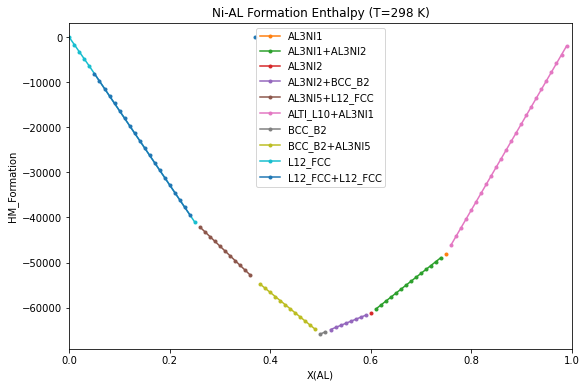

In [47]:
# Plot
fig = plt.figure(figsize=(9,6))
ax = fig.gca()
for phase_set in unique_phase_sets:
    label = '+'.join([ph for ph in phase_set if ph != ''])
    # composition indices with the same unique phase
    unique_phase_idx = np.nonzero(np.all(result.Phase.values.squeeze() == phase_set, axis=1))[0]
    masked_result = result.isel(X_AL=unique_phase_idx)
    ax.plot(masked_result.X_AL.squeeze(), masked_result.HMR.squeeze(), marker='.', label=label)
ax.set_xlim((0, 1))
ax.set_xlabel('X(AL)')
ax.set_ylabel('HM_Formation')
ax.set_title('Ni-AL Formation Enthalpy (T=298 K)')
ax.legend()

In [48]:
# Calculate the enthalpy of mixing in the liquid phase at a high temperature of your choice.

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from pycalphad import Database, calculate, equilibrium, binplot
import pycalphad.variables as v
from binary_helpers import plot_convex_hull

# Load database and choose the phases that will be considered
dbf = Database('AlNi-1997Ansara.TDB')
comps = ['AL', 'NI', 'VA']
phases = sorted(dbf.phases)

eq_alni = equilibrium(dbf, ['AL', 'NI', 'VA'], phases, {v.X('AL'): 1, v.T: (300, 2500, 20), v.P: 101325})


In [ ]:
from pycalphad.plot.utils import phase_legend
import matplotlib.patches as mpatches

for T in [1000]:
    legend_handles, color_dict = phase_legend(phases)
    plt.figure()
    # Loop over phases, calculate the Gibbs energy, and scatter plot HM_MIX vs. X(SN)
    phases=['LIQUID']
    for phase_name in phases:
        result = calculate(dbf, comps, phase_name, P=101325, T=T, N=1, output='HM_MIX')
        plt.scatter(result.X.sel(component='AL'), result.HM_MIX, marker='.', s=5, color=color_dict[phase_name], label=phase_name)
    plot_convex_hull(dbf, comps, phases, {v.T: T, v.X('AL'): (0, 1, 0.01), v.N: 1, v.P: 1e5})
    legend_handles.append(mpatches.mlines.Line2D([], [], color='limegreen', label='convex hull', linestyle=':', lw=3))
    # Format the plot
    plt.title(f'T = {T} K')
    plt.xlabel('X(AL)')
    plt.ylabel('HM')
    plt.xlim((0, 1))
    plt.legend(handles=legend_handles, loc='center left', bbox_to_anchor=(1, 0.6))
    plt.show()

In [ ]:
# Calculate the binary phase diagram and label all phase regions of one, two, and three phases in equilibrium

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
from pycalphad import Database, binplot
import pycalphad.variables as v

# Load database
dbf = Database('AlNi-1997Ansara.TDB')
# Set the components to consider, including vacanies (VA) explictly.
comps = ['AL', 'NI', 'VA']
# Get all the phases in the database programatically
phases = list(dbf.phases.keys())
# Create the dictionary of conditions
conds = {
    v.N: 1, v.P: 101325,
    v.T: (300, 2000, 10),  # (start, stop, step)
    v.X('AL'): (1e-5, 1, 0.02),   # (start, stop, step)
}

# Create a matplotlib Figure object and get the active Axes
fig = plt.figure(figsize=(9,6))
axes = fig.gca()

# Plot by passing in all the variables
binplot(dbf, comps, phases, conds, plot_kwargs={'ax': axes})

plt.show()